<a href="https://colab.research.google.com/github/Elielkundai1/Extern_DataScience_workSample/blob/main/DowntownRestaurants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd

data = files.upload()

Saving Chicago_downtown_restaurant.csv to Chicago_downtown_restaurant (2).csv


In [148]:
df = pd.read_csv(io.StringIO(data['Chicago_downtown_restaurant.csv'].decode('utf-8')))

In [149]:
df.head()

,Restaurant,details,rating,reviewers,Pricing,Location,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,rllt__wrapped
0,Flight Club Chicago,· · Restaurant,4.6,(1K),$$,111 W Wacker Dr,NaN,NaN,NaN,NaN,NaN
1,Cite,· · American restaurant,3.5,(862),$$$,505 N Lake Shore Dr Lake Point Tower 70th Floor,NaN,NaN,NaN,NaN,NaN
2,Roanoke Restaurant,· · Restaurant,4.3,(1.2K),$$,"Chicago, IL",NaN,NaN,NaN,NaN,Refined hotel lounge with comfort food
3,The Dearborn,· · American,4.6,(2.7K),$$,"Chicago, IL · In 108 North State Street",NaN,NaN,NaN,NaN,Chic American tavern with seasonal fare
4,The Berghoff Restaurant,· · German,4.4,(3.5K),$$,"Chicago, IL",NaN,NaN,NaN,NaN,Classic German eatery


In [150]:
df.dtypes

Restaurant        object
details           object
rating           float64
reviewers         object
Pricing           object
Location          object
Unnamed: 6       float64
Unnamed: 7       float64
Unnamed: 8       float64
Unnamed: 9       float64
rllt__wrapped     object
dtype: object

In [151]:
rs = df['Restaurant']

In [152]:
rt = df['rating']
rv = df['reviewers']

In [153]:
df.isnull().sum()

Restaurant         2
details            2
rating             6
reviewers          6
Pricing           32
Location           2
Unnamed: 6       139
Unnamed: 7       139
Unnamed: 8       139
Unnamed: 9       139
rllt__wrapped     23
dtype: int64

In [154]:
dsc = df['rllt__wrapped']
df.isnull().sum()

Restaurant         2
details            2
rating             6
reviewers          6
Pricing           32
Location           2
Unnamed: 6       139
Unnamed: 7       139
Unnamed: 8       139
Unnamed: 9       139
rllt__wrapped     23
dtype: int64

In [155]:
df.dropna(inplace=True)

In [156]:
df.isnull().sum()

Restaurant       0.0
details          0.0
rating           0.0
reviewers        0.0
Pricing          0.0
Location         0.0
Unnamed: 6       0.0
Unnamed: 7       0.0
Unnamed: 8       0.0
Unnamed: 9       0.0
rllt__wrapped    0.0
dtype: float64

In [157]:
df['Restaurant'] = df['Restaurant'].astype('int')
df['details'] = df['details'].astype('int')
df['rating'] = df['rating'].astype('int')
df['reviewers'] = df['reviewers'].astype('int')
df['Pricing'] = df['Pricing'].astype('int')
df['Location'] = df['Location'].astype('int')
df['rllt__wrapped'] = df['rllt__wrapped'].astype('int')


In [19]:
df.dtypes

Restaurant         int64
details            int64
rating             int64
reviewers          int64
Pricing            int64
Location           int64
Unnamed: 6       float64
Unnamed: 7       float64
Unnamed: 8       float64
Unnamed: 9       float64
rllt__wrapped      int64
dtype: object

In [20]:
from plotnine.data import mpg
from plotnine import ggplot, aes, labs, geom_point
from plotnine.geoms.geom_bar import geom_bar
from plotnine.geoms.geom_smooth import geom_smooth

In [23]:
from pandas.io.formats.style_render import DataFrame
DataFrame.mean(rt)

4.356390977443609

In [25]:
DataFrame.std(rt)

0.35384326770449503

In [165]:
df.assign(highR =(rt >=4), lowR = (rt <4))

,Restaurant,details,rating,reviewers,Pricing,Location,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,rllt__wrapped,highR,lowR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


The graph below shows that in a collection of 140 local restaurants in downtown Chicago, more than 20 restaurants are rated over 4.5. This shows there are great places to explore for one to find a good meal in downtown Chicago.

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:324: PlotnineWarning: stat_count : Removed 6 rows containing non-finite values.


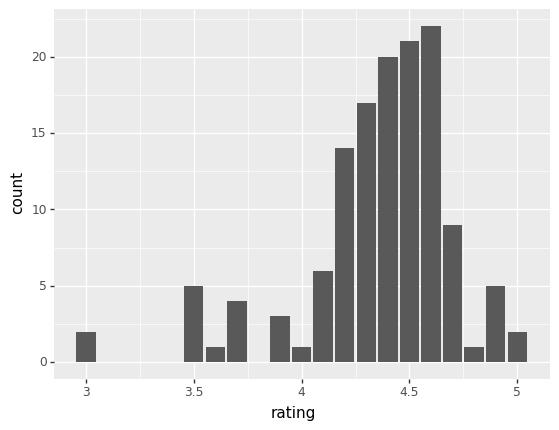

<ggplot: (8792881109957)>

In [164]:
(
    ggplot(df)+ aes(x=rt)+  geom_bar() 
)

In [173]:
from IPython.display import HTML, display
display(df)

,Restaurant,details,rating,reviewers,Pricing,Location,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,rllt__wrapped
